# Previsão de Rotatividade de Funcionários com Machine Learning

## Descrição do problema

O objetivo deste projeto é desenvolver um modelo de machine learning supervisionado capaz de prever a probabilidade de um funcionário deixar a empresa, utilizando dados históricos do departamento de Recursos Humanos. A partir da análise de variáveis relacionadas ao perfil profissional, desempenho e histórico de trabalho dos colaboradores, o modelo buscará identificar padrões e fatores que influenciam a rotatividade. Com isso, pretende-se oferecer uma ferramenta preditiva que apoie a gestão estratégica de talentos, possibilitando ações preventivas para aumentar a retenção de funcionários, reduzir custos de desligamento e fortalecer a sustentabilidade organizacional.

### Resumo dos insumos
Os dados coletados pelo departamento de RH de uma empresa a serem trabalhados neste projeto.

| Variável | Descrição |
| -------- | --------- |
| Age | Idade do funcionário |
| Attrition | Funcionário que saiu da empresa (0=não, 1=sim) |
| BusinessTravel | Indica a frequência com que o funcionário viaja |
| Department | Indica o departamento em que o funcionário trabalha |
| DistanceFromHome | Distância da casa do funcionário até a empresa |
| Education | Nível de escolaridade (1='Abaixo da faculdade', 2='Universidade', 3='Bacharelado', 4='Mestrado', 5='Doutor') |
| EducationField | Área de estudo dos funcionários |
| EmployeeCount | Contagem de funcionários |
| EmployeeID | Número de identificação do funcionário |
| Gender | Sexo do funcionário |
| JobLevel | Nível da função do funcionário na empresa |
| JobRole | Nome da função do funcionário |
| MaritalStatus | Estado civil do funcionário |
| MonthlyIncome | Renda mensal do funcionário |
| NumCompaniesWorked | Número de empresas em que o funcionário já trabalhou |
| Over18 | se o funcionário tem mais de 18 anos (verdadeiro/falso) |
| PercentSalaryHike | Aumento percentual do salário |
| StandardHours | Horário de trabalho padrão |
| StockOptionLevel | Participação em ações (Quanto maior for o número, mais opções de ações um funcionário tem) |
| TotalWorkingYears | Anos trabalhados |
| TrainingTimesLastYear | Total de horas dedicadas ao treinamento no último ano |
| YearsAtCompany | Anos trabalhados nesta empresa |
| YearsSinceLastPromotion | Anos desde a última promoção |
| YearsWithCurrManag | Anos trabalhando com o gerente atual |

## Imports e dataset

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("../data/rh_data.csv")

## 1. Tratamento dos dados

In [3]:
df.shape

(4410, 24)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

### a. Identificação e tratamento dos nulos

In [5]:
df[['NumCompaniesWorked', 'TotalWorkingYears']].isna().sum()

NumCompaniesWorked    19
TotalWorkingYears      9
dtype: int64

In [6]:
df[df[['NumCompaniesWorked', 'TotalWorkingYears']].isna().all(axis=1)]

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager


In [7]:
df['NumCompaniesWorked'] = df['NumCompaniesWorked'].fillna(1)

In [8]:
df.loc[
    df['TotalWorkingYears'].isna() & (df['NumCompaniesWorked'] == 1),
    'TotalWorkingYears'
] = df['YearsAtCompany']

In [9]:
df = df.dropna()

In [10]:
df[['NumCompaniesWorked', 'TotalWorkingYears']].isna().sum()

NumCompaniesWorked    0
TotalWorkingYears     0
dtype: int64

### b. Identificação e tratamento das duplicatas

In [11]:
df.duplicated().any()

np.False_

In [12]:
df[df['EmployeeID'].duplicated()]

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager


### c. Gerenciamento dos dados

🔵 Identificar e gerenciar dados fora do escopo de análise

🔵 Identificar e tratar dados discrepantes em variáveis ​​categóricas

🔵 Identificar e tratar dados discrepantes em variáveis ​​numéricas

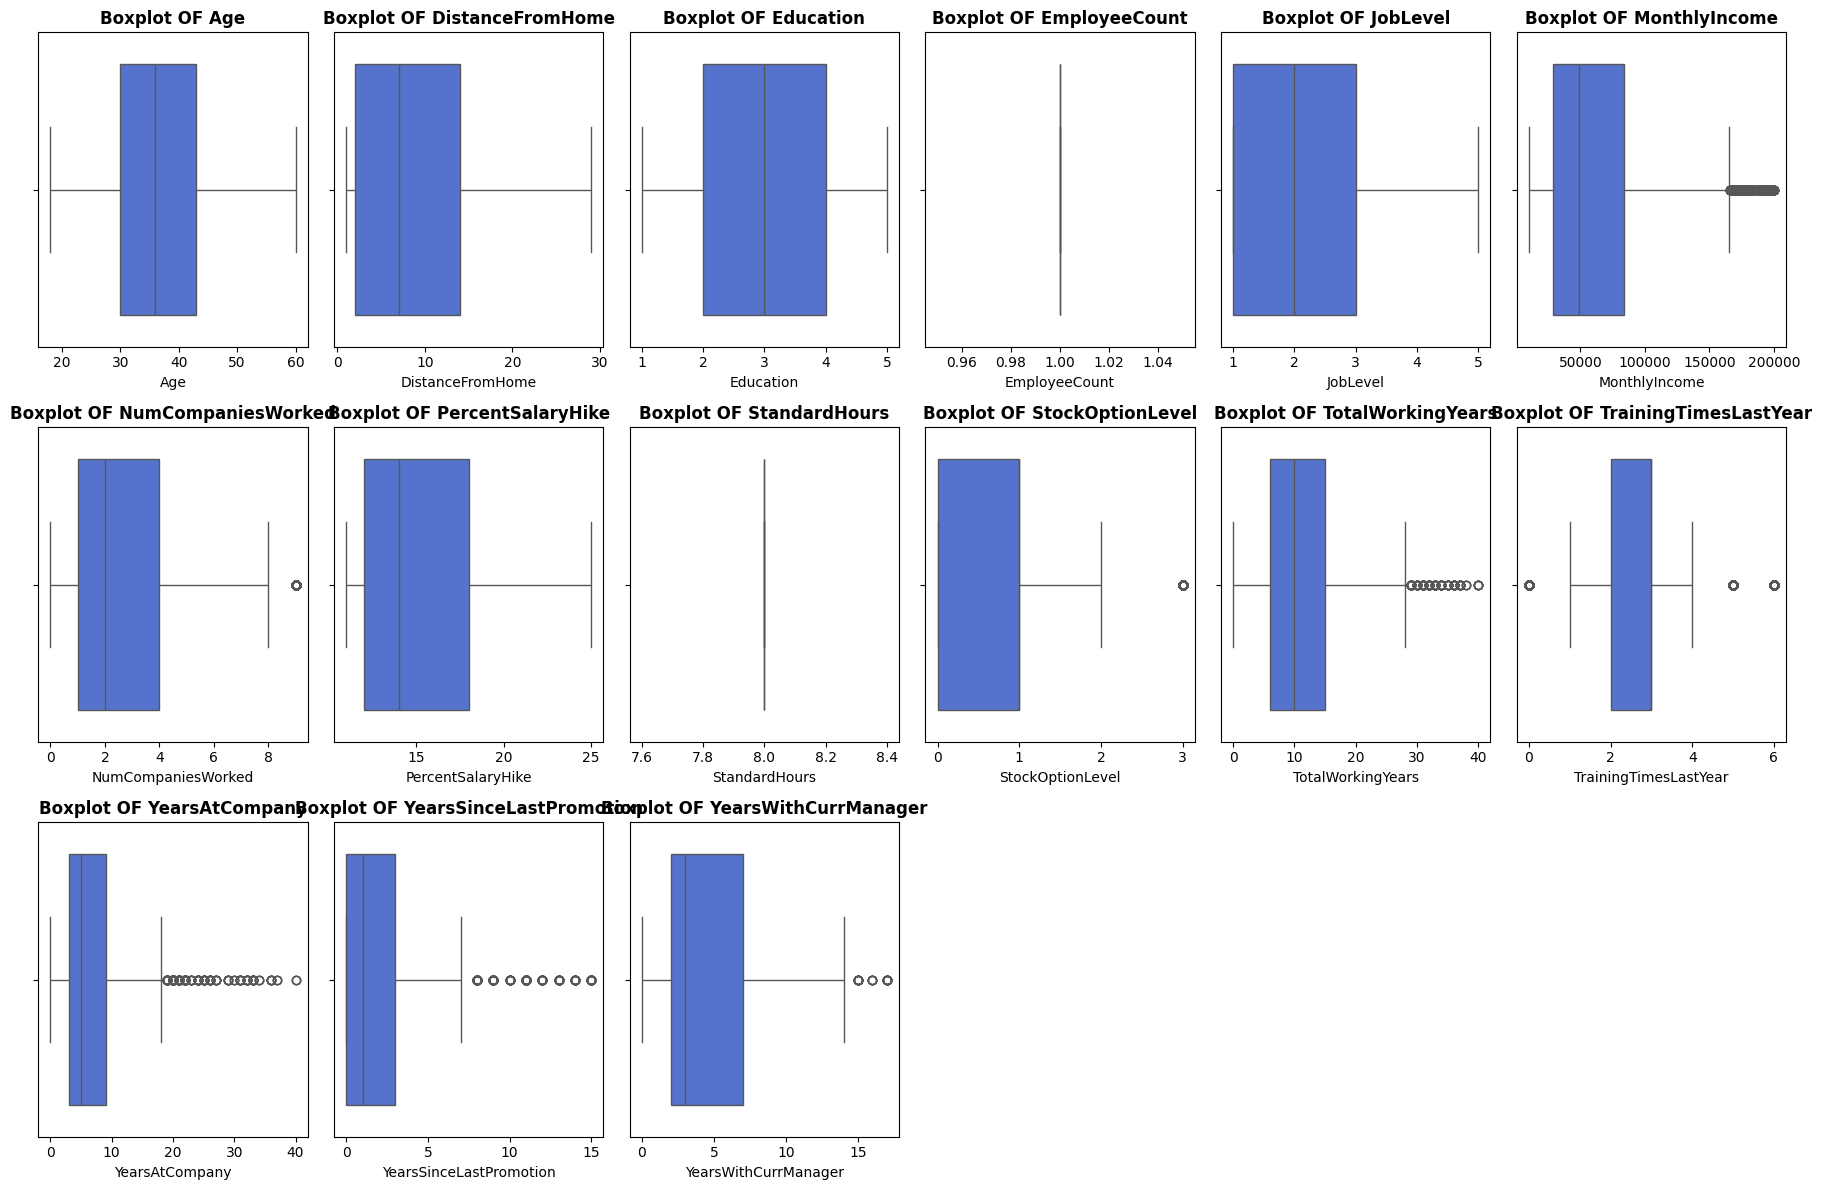

In [13]:
analysis_columns = df.select_dtypes(include=['int64', 'float64']).columns.difference(['EmployeeID'])

n_cols = 6
n_rows = math.ceil(len(analysis_columns) / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
axes = axes.flatten()
for i, col in enumerate(analysis_columns):
    if col in df.columns:
        sns.boxplot(x=df[col], color="royalblue", ax=axes[i])
        axes[i].set_title(f"Boxplot OF {col}", fontsize=12, fontweight="bold")
        axes[i].set_xlabel(col)
        axes[i].set_ylabel("")
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

EmployeeCount, Over18, StandardHours parecem constantes em todo o dataset, então foram removidas

In [14]:
df.drop(columns=['EmployeeCount', 'Over18', 'StandardHours'], inplace=True)

In [15]:
df['NumCompaniesWorked'].value_counts()

NumCompaniesWorked
1.0    1577
0.0     584
3.0     474
2.0     438
4.0     413
7.0     219
6.0     208
5.0     187
9.0     156
8.0     147
Name: count, dtype: int64

In [16]:
df.loc[df['NumCompaniesWorked'] == 0, 'NumCompaniesWorked'] = 1

In [17]:
for col in df.select_dtypes('object'):
    print(col, df[col].unique())

Attrition ['No' 'Yes']
BusinessTravel ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department ['Sales' 'Research & Development' 'Human Resources']
EducationField ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender ['Female' 'Male']
JobRole ['Healthcare Representative' 'Research Scientist' 'Sales Executive'
 'Human Resources' 'Research Director' 'Laboratory Technician'
 'Manufacturing Director' 'Sales Representative' 'Manager']
MaritalStatus ['Married' 'Single' 'Divorced']


In [18]:
categorical_cols = df.select_dtypes('object').columns
df[categorical_cols] = df[categorical_cols].astype('category')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4403 entries, 0 to 4408
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Age                      4403 non-null   int64   
 1   Attrition                4403 non-null   category
 2   BusinessTravel           4403 non-null   category
 3   Department               4403 non-null   category
 4   DistanceFromHome         4403 non-null   int64   
 5   Education                4403 non-null   int64   
 6   EducationField           4403 non-null   category
 7   EmployeeID               4403 non-null   int64   
 8   Gender                   4403 non-null   category
 9   JobLevel                 4403 non-null   int64   
 10  JobRole                  4403 non-null   category
 11  MaritalStatus            4403 non-null   category
 12  MonthlyIncome            4403 non-null   int64   
 13  NumCompaniesWorked       4403 non-null   float64 
 14  PercentSalary

In [20]:
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4403 entries, 0 to 4408
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4403 non-null   int64  
 1   Attrition                4403 non-null   int64  
 2   BusinessTravel           4403 non-null   int64  
 3   Department               4403 non-null   int64  
 4   DistanceFromHome         4403 non-null   int64  
 5   Education                4403 non-null   int64  
 6   EducationField           4403 non-null   int64  
 7   EmployeeID               4403 non-null   int64  
 8   Gender                   4403 non-null   int64  
 9   JobLevel                 4403 non-null   int64  
 10  JobRole                  4403 non-null   int64  
 11  MaritalStatus            4403 non-null   int64  
 12  MonthlyIncome            4403 non-null   int64  
 13  NumCompaniesWorked       4403 non-null   float64
 14  PercentSalaryHike        4403

### d. Criação de variáveis

In [22]:
bins = [18, 25, 35, 45, 55, 65]
labels = ['18-25', '26-35', '36-45', '46-55', '56+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

In [23]:
df['AvgYearsPerCompany'] = df['TotalWorkingYears'] / df['NumCompaniesWorked']

In [24]:
df['PromotionRate'] = df['YearsSinceLastPromotion'] / (df['TotalWorkingYears'] + 1)

In [25]:
df['FarFromHome'] = (df['DistanceFromHome'] > df['DistanceFromHome'].median()).astype(int)

In [26]:
df['SalaryHikePerIncome'] = df['PercentSalaryHike'] / df['MonthlyIncome']

In [27]:
df['EducationDomain'] = df['EducationField'].replace({
    'Life Sciences': 'STEM',
    'Medical': 'STEM',
    'Technical Degree': 'STEM',
    'Human Resources': 'Business',
    'Marketing': 'Business',
    'Other': 'Other'
})

In [28]:
df['CompanyExperienceRatio'] = df['YearsAtCompany'] / (df['TotalWorkingYears'] + 1)

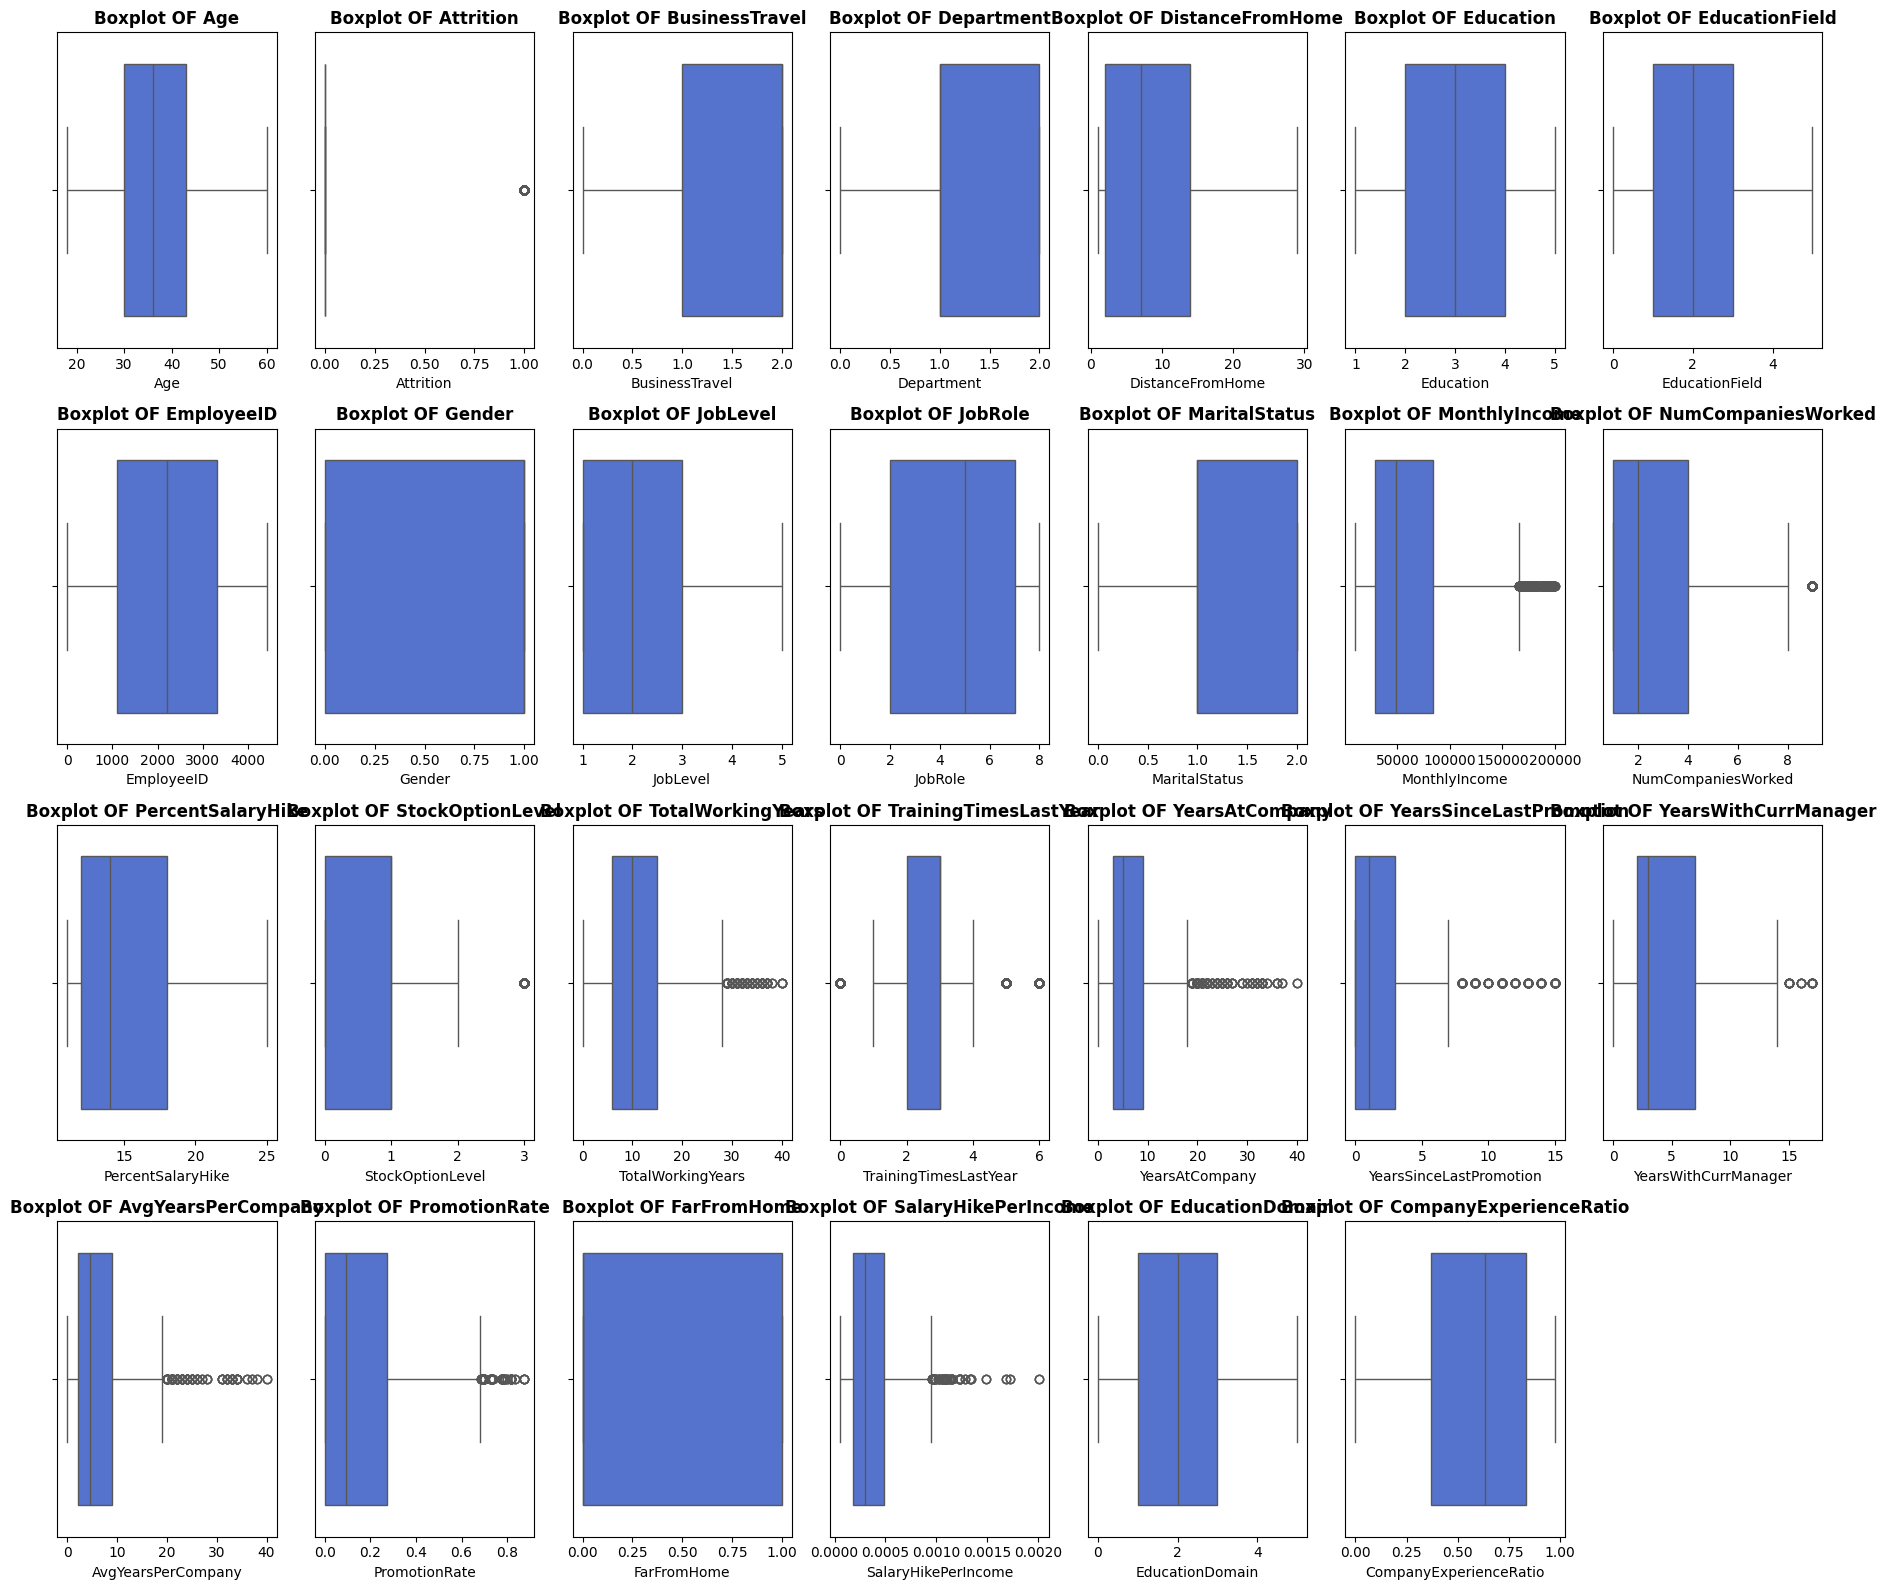

In [29]:
analysis_columns = df.select_dtypes(include=['int64', 'float64']).columns

n_cols = 7
n_rows = math.ceil(len(analysis_columns) / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
axes = axes.flatten()
for i, col in enumerate(analysis_columns):
    if col in df.columns:
        sns.boxplot(x=df[col], color="royalblue", ax=axes[i])
        axes[i].set_title(f"Boxplot OF {col}", fontsize=12, fontweight="bold")
        axes[i].set_xlabel(col)
        axes[i].set_ylabel("")
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### e. Dividir a base em treino e teste

In [30]:
X = df.drop(columns=['Attrition'])
y = df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## 2. Análise Exploratória dos Dados (AED/EDA)

In [31]:
categorical_cols = df.select_dtypes('category').columns.tolist()

for col in categorical_cols:
    display(
        df.groupby(col, observed=True)['Attrition']
          .value_counts(normalize=True)
          .unstack()
          .round(3)
    )

Attrition,0,1
AgeGroup,,
18-25,0.608,0.392
26-35,0.798,0.202
36-45,0.899,0.101
46-55,0.899,0.101
56+,0.841,0.159


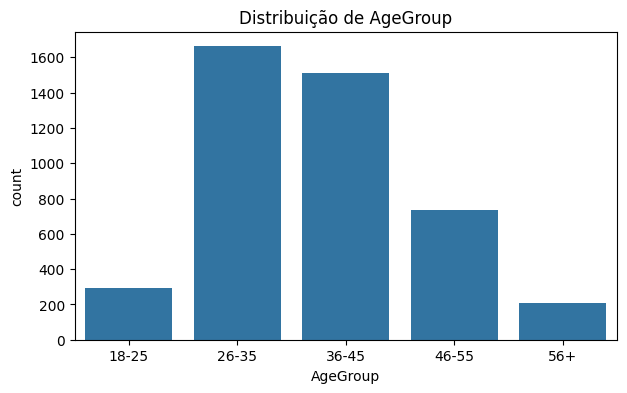

In [32]:
for col in categorical_cols:
    plt.figure(figsize=(7,4))
    sns.countplot(data=df, x=col)
    plt.title(f'Distribuição de {col}')
    plt.show()

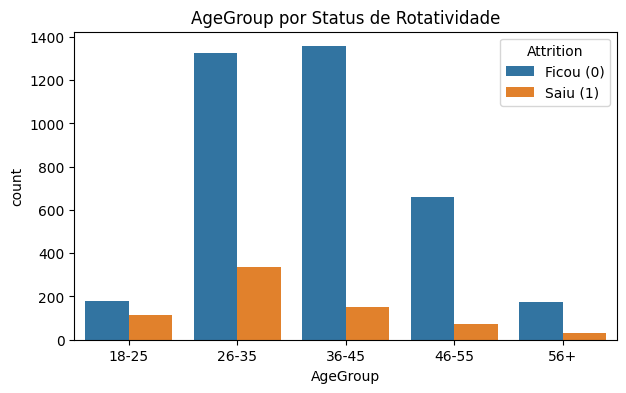

In [33]:
for col in categorical_cols:
    plt.figure(figsize=(7,4))
    sns.countplot(data=df, x=col, hue='Attrition')
    plt.title(f'{col} por Status de Rotatividade')
    plt.legend(title='Attrition', labels=['Ficou (0)', 'Saiu (1)'])
    plt.show()


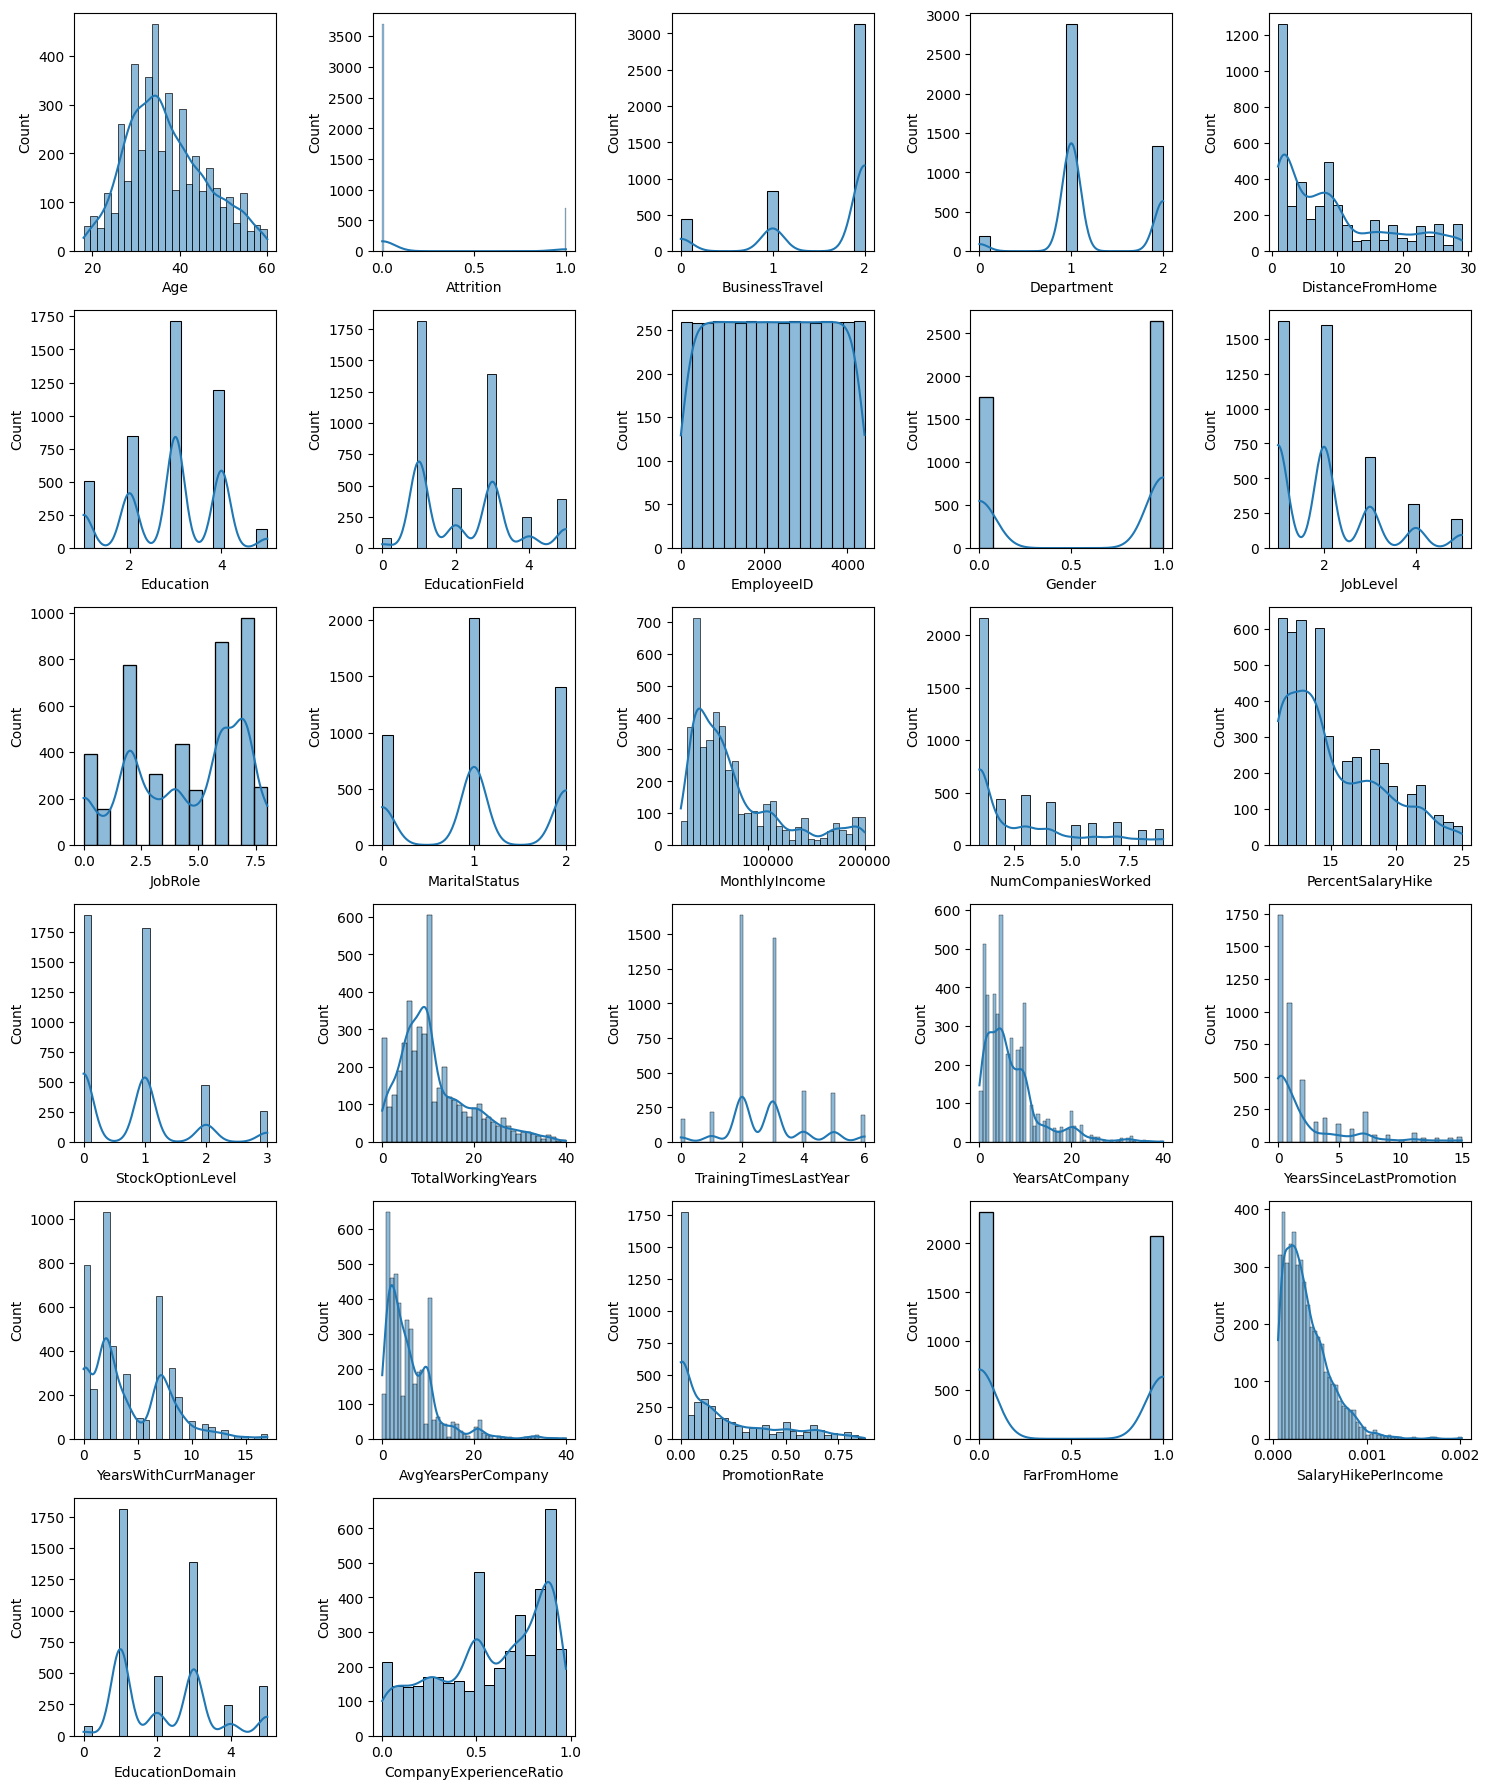

In [34]:
N_COLS = 5
N_ROWS = math.ceil(len(analysis_columns) / N_COLS)

plt.figure(figsize=(3 * N_COLS, 3 * N_ROWS))
plt.subplots_adjust(hspace=0.2)

for i, col in enumerate(analysis_columns):
    plt.subplot(N_ROWS, N_COLS, i + 1)
    sns.histplot(data=df, x=col, kde=True)
    plt.xlabel(col)

plt.tight_layout()
plt.show()

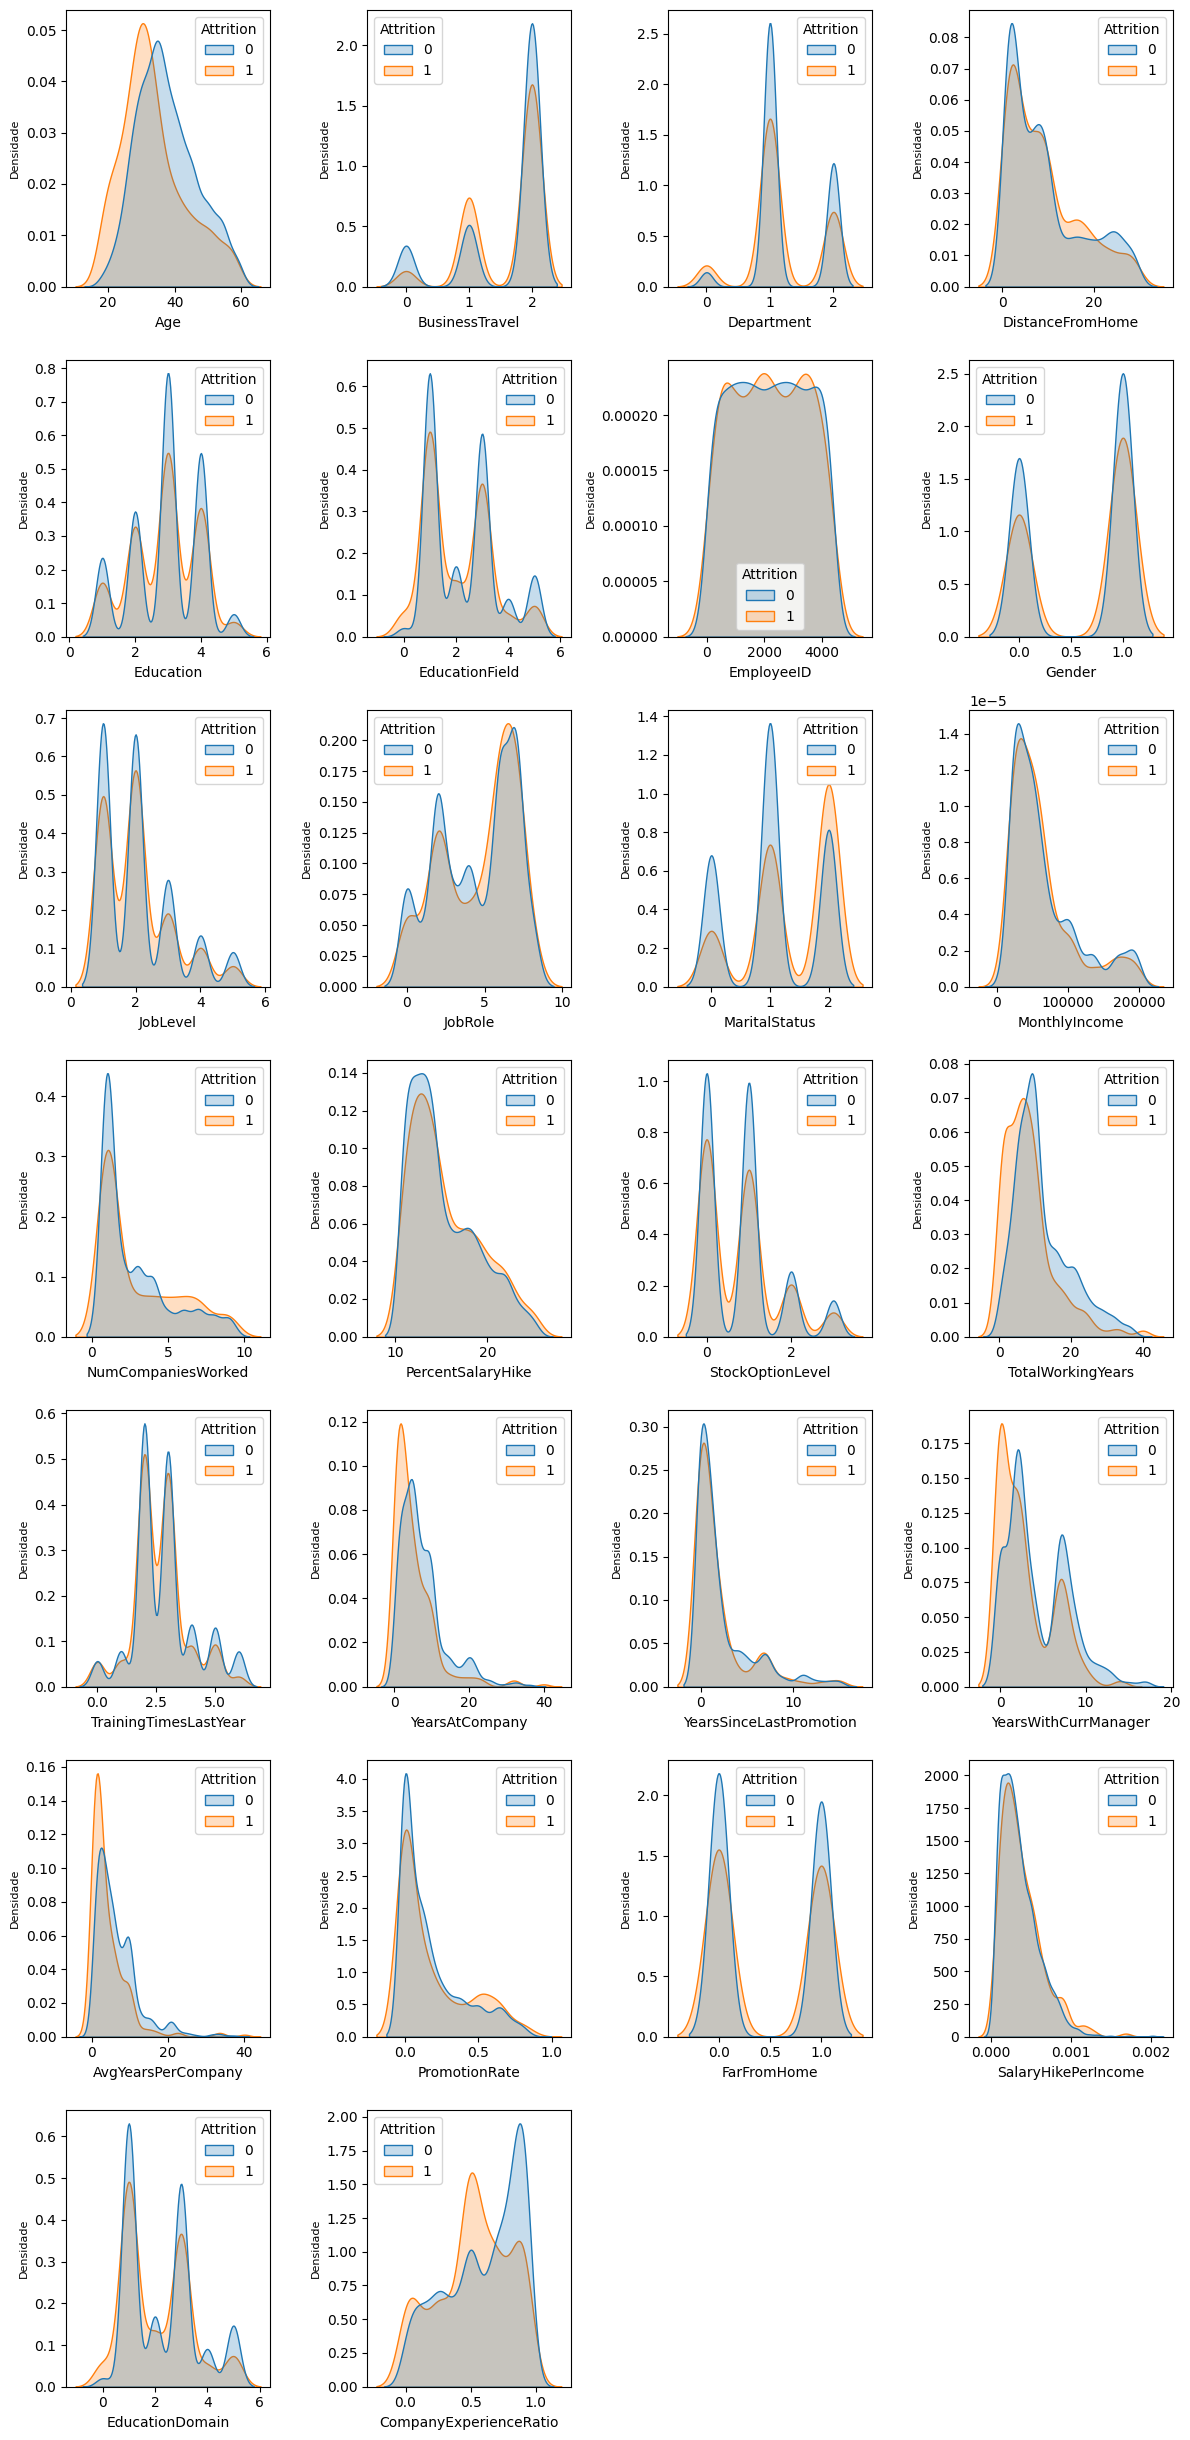

In [35]:
N_COLS = 4
analysis_cols_list = [col for col in analysis_columns if col != 'Attrition']
N_ROWS = math.ceil(len(analysis_cols_list) / N_COLS)

plt.figure(figsize=(3 * N_COLS, 3.5 * N_ROWS))
plt.subplots_adjust(hspace=0.5)

for i, col in enumerate(analysis_cols_list):
    if df[col].var() == 0:
        print(f"ATENÇÃO: Coluna '{col}' possui variância zero e foi pulada.")
        continue
    
    plt.subplot(N_ROWS, N_COLS, i + 1)

    sns.kdeplot(
        data=df, 
        x=col, 
        hue='Attrition', 
        fill=True, 
        common_norm=False, 
        warn_singular=False 
    )

    plt.xlabel(col, fontsize=10)
    plt.ylabel('Densidade', fontsize=8)

plt.tight_layout()
plt.show()

In [ ]:
correlation_matrix = df[analysis_columns].corr(method='pearson')

plt.figure(figsize=(len(analysis_columns) * 0.6, len(analysis_columns) * 0.5))

mask_low_corr = (np.abs(correlation_matrix) < 0.1) & (correlation_matrix != 1.0)

sns.heatmap(
    correlation_matrix.round(2),
    mask=np.triu(np.ones_like(correlation_matrix, dtype=bool)),
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.8,
    square=True,
    center=0,
    vmin=-1, vmax=1,
    cbar_kws={
        "shrink": 0.8,
        "label": "Pearson Correlation",
        "ticks": [-1, -0.5, 0, 0.5, 1]
    },
    annot_kws={
        "fontsize": 9
    }
)

plt.title("Pearson Correlation Matrix\n(Upper Triangle)", 
          fontsize=16, fontweight="bold", pad=20)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(rotation=0, fontsize=10)

plt.grid(False)

plt.tight_layout()
plt.show()

In [36]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4403.0,36.919600,9.138611,18.000000,30.000000,36.000000,43.000000,60.000000
Attrition,4403.0,0.161254,0.367807,0.000000,0.000000,0.000000,0.000000,1.000000
BusinessTravel,4403.0,1.607767,0.665161,0.000000,1.000000,2.000000,2.000000,2.000000
Department,4403.0,1.260504,0.527784,0.000000,1.000000,1.000000,2.000000,2.000000
DistanceFromHome,4403.0,9.187145,8.102055,1.000000,2.000000,7.000000,14.000000,29.000000
Education,4403.0,2.912560,1.024389,1.000000,2.000000,3.000000,4.000000,5.000000
EducationField,4403.0,2.248694,1.331364,0.000000,1.000000,2.000000,3.000000,5.000000
EmployeeID,4403.0,2206.181240,1272.721483,1.000000,1104.500000,2206.000000,3308.500000,4409.000000
Gender,4403.0,0.599818,0.489991,0.000000,0.000000,1.000000,1.000000,1.000000
JobLevel,4403.0,2.064729,1.107013,1.000000,1.000000,2.000000,3.000000,5.000000


In [37]:
df.groupby('Attrition')[num_cols].mean().T

Attrition,0,1
Age,37.559978,33.588732
Attrition,0.000000,1.000000
BusinessTravel,1.607636,1.608451
Department,1.271595,1.202817
DistanceFromHome,9.219334,9.019718
Education,2.919307,2.877465
EducationField,2.282426,2.073239
EmployeeID,2208.442459,2194.419718
Gender,0.595992,0.619718
JobLevel,2.069591,2.039437


In [38]:
df[num_cols].std().sort_values(ascending=False)

MonthlyIncome              47071.504652
EmployeeID                  1272.721483
Age                            9.138611
DistanceFromHome               8.102055
TotalWorkingYears              7.783106
YearsAtCompany                 6.125725
AvgYearsPerCompany             5.652611
PercentSalaryHike              3.658456
YearsWithCurrManager           3.567898
YearsSinceLastPromotion        3.223581
JobRole                        2.461752
NumCompaniesWorked             2.371836
EducationDomain                1.331364
EducationField                 1.331364
TrainingTimesLastYear          1.288374
JobLevel                       1.107013
Education                      1.024389
StockOptionLevel               0.852098
MaritalStatus                  0.729842
BusinessTravel                 0.665161
Department                     0.527784
FarFromHome                    0.499307
Gender                         0.489991
Attrition                      0.367807
CompanyExperienceRatio         0.284524
